In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
%matplotlib inline

In [3]:
#secretNumber = '1000101'
# Ask the user for a number input and convert it to an integer
secretNumber = input("Please enter a secret BINARY number: ")

Please enter a secret number:  1001011010


In [4]:
#secretNumber is the number we want to find out
circuit = QuantumCircuit(len(secretNumber) + 1, len(secretNumber))

index 0 is 0
index 1 is 1
index 2 is 0
index 3 is 1
index 4 is 1
index 5 is 0
index 6 is 1
index 7 is 0
index 8 is 0
index 9 is 1


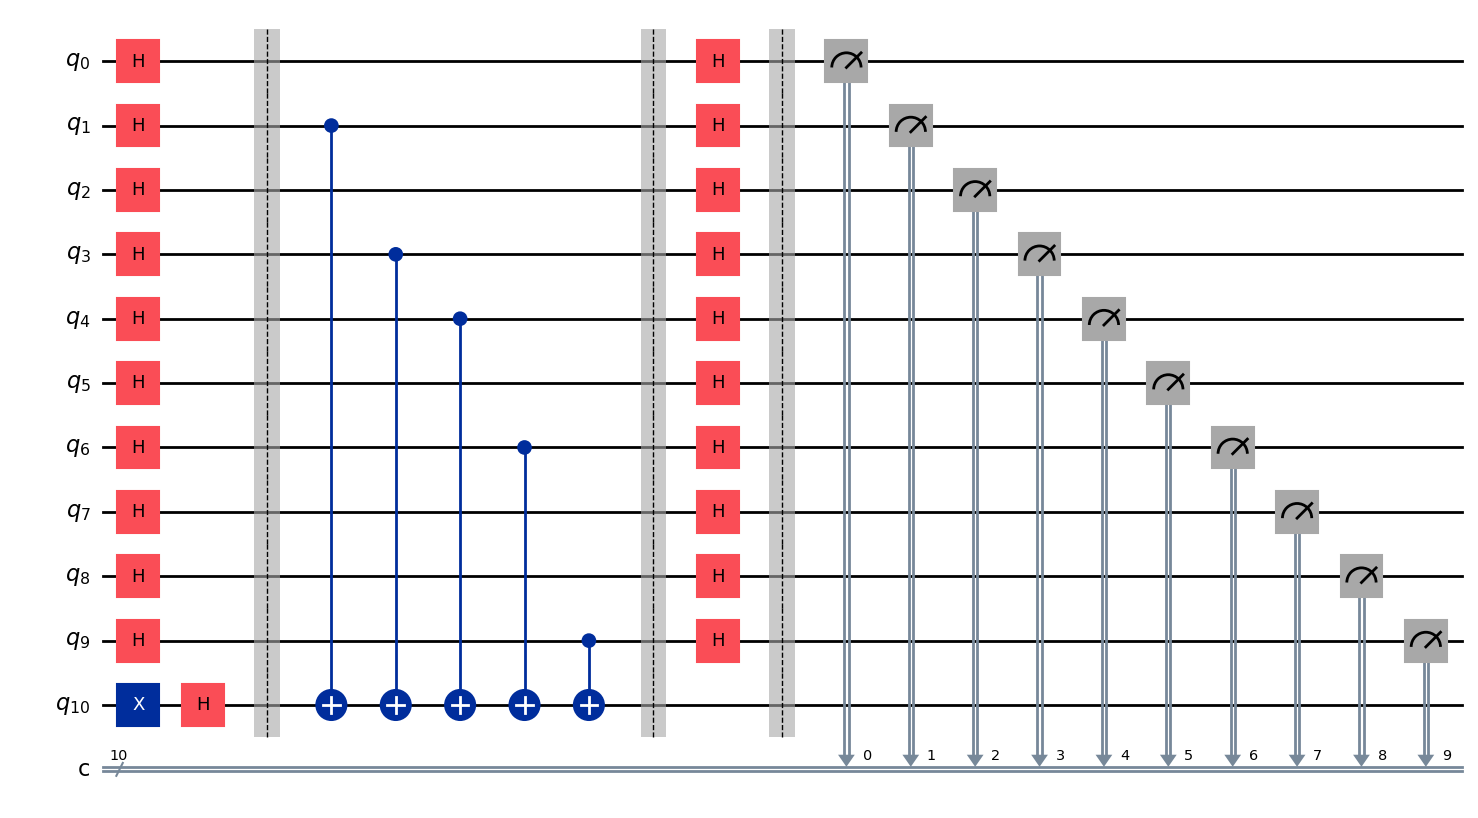

In [5]:
#range(len(secretNumber)) gives the the range (from 0 to a given number)
#len(secretNumber) gives the length of the array, strings counts too as char array
circuit.h(range(len(secretNumber)))
circuit.x(len(secretNumber))
circuit.h(len(secretNumber))

circuit.barrier()

#In python array[::-1] will give reversed order start:stop:step 
for index, num in enumerate(secretNumber[::-1]):
    print(f"index {index} is {num}")
    if num == "1":
        circuit.cx(index, len(secretNumber))

circuit.barrier()
circuit.h(range(len(secretNumber)))
circuit.barrier()

circuit.measure(range(len(secretNumber)),range(len(secretNumber)))

circuit.draw(output='mpl')

{'1001011010': 1024}


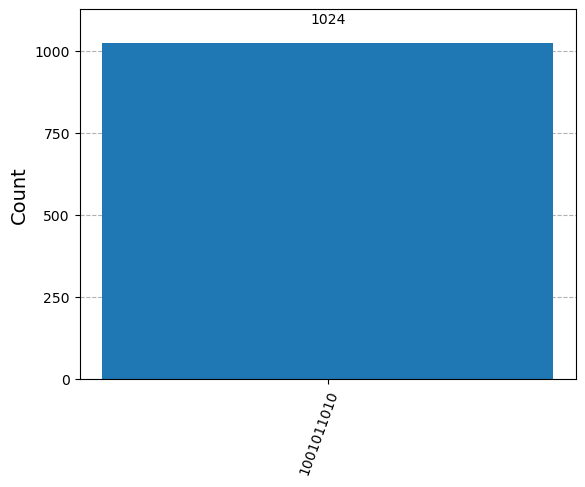

In [6]:
simulator = AerSimulator()
#How to run with a specific amount of shots (Defaults to 1024 if unspecified)
#result = simulator.run(circuit, shots=1).result()
result = simulator.run(circuit).result()
counts = result.get_counts(circuit)
#execute(circuit, backend=simulator, shots=1024).result()
print(counts)
plot_histogram(counts)

In [7]:
#Block used to learn Bernstein Vazirani Algorithm (Hard Coded)
'''
#setup for Bernstein Vazirani
circuit = QuantumCircuit(8,7)

circuit.h([0,1,2,3,4,5,6])
circuit.x(7)
circuit.h(7)

circuit.barrier()

#Ordering does not matter
circuit.cx(0,7)
circuit.cx(2,7)
circuit.cx(6,7)
circuit.barrier()


circuit.h([0,1,2,3,4,5,6])
circuit.measure([0,1,2,3,4,5,6],[0,1,2,3,4,5,6])

circuit.draw(output='mpl')
'''

"\n#setup for Bernstein Vazirani\ncircuit = QuantumCircuit(8,7)\n\ncircuit.h([0,1,2,3,4,5,6])\ncircuit.x(7)\ncircuit.h(7)\n\ncircuit.barrier()\n\n#Ordering does not matter\ncircuit.cx(0,7)\ncircuit.cx(2,7)\ncircuit.cx(6,7)\ncircuit.barrier()\n\n\ncircuit.h([0,1,2,3,4,5,6])\ncircuit.measure([0,1,2,3,4,5,6],[0,1,2,3,4,5,6])\n\ncircuit.draw(output='mpl')\n"